# Distance function usage demonstration on a synthetic dataset
Goal of the excercise is to code Euclidean distance on your own and apply it to the NumPy matrix containing n-dimensional vectors (data points) in an Euclidean space as a rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Calculating distances between data points using Euclidean distance

- Load data points from 'data_points.csv' into the Pandas DataFrame and save the raw NumPy array to the *data* variable using *values* property
- Check calculated distances from table
- Hint: set index_col to proper value in case that the data are not loaded correctly

In [2]:
df = pd.read_csv('../data/data_points.csv', index_col=0)
data = df.values
data

array([[7.777, 2.375, 8.243, 9.657, 9.726],
       [4.534, 6.09 , 7.755, 6.416, 7.22 ],
       [0.35 , 2.984, 0.585, 8.571, 3.729],
       [6.798, 2.563, 3.476, 0.094, 3.583],
       [9.491, 2.179, 3.194, 9.178, 0.319],
       [0.651, 6.298, 8.738, 0.087, 7.466],
       [8.128, 0.757, 6.565, 5.093, 4.799],
       [9.556, 0.   , 2.47 , 7.122, 3.246],
       [2.77 , 6.954, 9.186, 2.445, 4.581],
       [2.53 , 3.793, 6.045, 7.724, 0.679],
       [6.861, 5.483, 1.38 , 0.988, 2.456],
       [1.518, 9.26 , 6.801, 2.377, 5.689],
       [5.566, 0.727, 8.397, 4.053, 1.449],
       [1.909, 4.906, 7.12 , 9.849, 8.748],
       [4.99 , 1.068, 9.132, 3.649, 2.266],
       [8.724, 1.364, 2.364, 5.954, 5.639],
       [9.589, 4.532, 1.29 , 7.606, 2.016],
       [1.757, 4.371, 3.403, 9.673, 1.43 ],
       [8.446, 6.694, 1.093, 0.883, 9.665],
       [1.943, 0.819, 2.694, 6.501, 5.468],
       [6.967, 9.631, 2.777, 2.336, 8.457],
       [2.242, 6.889, 1.535, 2.036, 0.676],
       [7.495, 1.801, 1.243, 2.2

## Implement the *euclid_distance* function which takes two NumPy arrays as an input and return the distance between these two vectors
- Test the function on the first two rows of the matrix afterwards
    - Result = 6.429660566468498

In [3]:
def euclid_distance(x, y):
    assert x.size == y.size
    res = 0
    for i in range(len(x)):
        res += pow(x[i] - y[i], 2)
    return math.sqrt(res)
    pass

In [4]:
euclid_distance(data[0], data[1])

6.429660566468498

## Compute the distance matrix for the input data
- Elements of the matrix contain the distances between every two vectors of the input data
    - What is the shape of this matrix?
    - Does the matrix have some properties which you can guess prior to the constructing such matrix?
    - [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) might render useful

In [5]:
n_points = data.shape[0]
distance_matrix = None

# Your code
distance_matrix = np.zeros(shape=(n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = euclid_distance(data[i], data[j])

distance_matrix  

array([[ 0.        ,  6.42966057, 12.30120234, ...,  8.94152023,
         6.0988626 , 11.80736778],
       [ 6.42966057,  0.        ,  9.76693903, ...,  3.72946685,
         3.90255275,  9.08397529],
       [12.30120234,  9.76693903,  0.        , ...,  7.28611659,
         7.7543148 ,  5.75374061],
       ...,
       [ 8.94152023,  3.72946685,  7.28611659, ...,  0.        ,
         4.10697955,  6.39868612],
       [ 6.0988626 ,  3.90255275,  7.7543148 , ...,  4.10697955,
         0.        ,  6.50663899],
       [11.80736778,  9.08397529,  5.75374061, ...,  6.39868612,
         6.50663899,  0.        ]])

In [6]:
for i, j in [(0,1), (1,0), (1,1), (0,2), (0,3), (0,4), (0,5),(22,2),(42, 34), (97, 81)]:
    print(f'|{i}|{j}|{round(distance_matrix[i, j], 3)}|')

|0|1|6.43|
|1|0|6.43|
|1|1|0.0|
|0|2|12.301|
|0|3|12.365|
|0|4|10.825|
|0|5|12.771|
|22|2|9.682|
|42|34|8.195|
|97|81|4.927|


|Point1|Point2|Euclidean distance|
|:-------|:-------|:--------|
|0|1|6.43|
|1|0|6.43|
|1|1|0.0|
|0|2|12.301|
|0|3|12.365|
|0|4|10.825|
|0|5|12.771|
|22|2|9.682|
|42|34|8.195|
|97|81|4.927|


## Continue with only 2 dimensional data
- Restrict our data to only first two dimensions, i.e. columns
- Calculate distance matrix for these points
- Visualize the data points
- Select one point and its epsilon neigborhood based on the values in a distance matrix and distinguish the selected points with color (select point 83 and use eps value 1.5)

In [7]:
df_2d = df.iloc[:, :2].copy()
df_2d.columns = ['x', 'y']
df_2d.head()

,x,y
0,7.777,2.375
1,4.534,6.090
2,0.350,2.984
3,6.798,2.563
4,9.491,2.179


In [8]:
data = df_2d.values

In [9]:
n_points = data.shape[0]
distance_matrix = None

# Your code
distance_matrix = np.zeros(shape=(n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = euclid_distance(data[i], data[j])

distance_matrix  

array([[0.        , 4.9313562 , 7.4519266 , ..., 6.40531131, 2.57103131,
        5.99148971],
       [4.9313562 , 0.        , 5.21086288, ..., 2.83740533, 2.96096471,
        5.02611311],
       [7.4519266 , 5.21086288, 0.        , ..., 2.5395915 , 5.01484875,
        1.83529425],
       ...,
       [6.40531131, 2.83740533, 2.5395915 , ..., 0.        , 3.84561009,
        3.11120073],
       [2.57103131, 2.96096471, 5.01484875, ..., 3.84561009, 0.        ,
        3.80900053],
       [5.99148971, 5.02611311, 1.83529425, ..., 3.11120073, 3.80900053,
        0.        ]])

<AxesSubplot:xlabel='x', ylabel='y'>

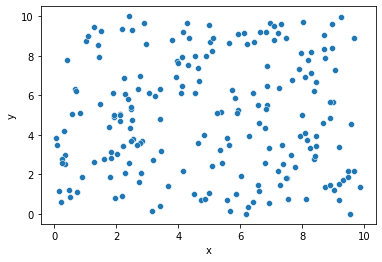

In [10]:
sns.scatterplot(data=df_2d, x='x', y='y')

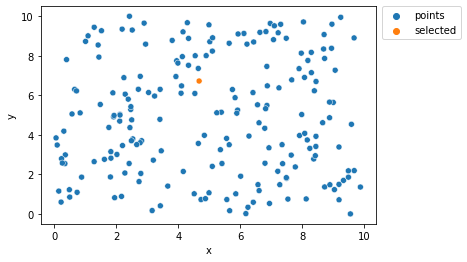

In [11]:
selected_point_id = 83
df_2d['mark'] = 'points'
df_2d.loc[selected_point_id, 'mark'] = 'selected'

sns.scatterplot(data=df_2d, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [12]:
eps = 1.5
np.where(distance_matrix[selected_point_id, :] < eps)[0]

array([  1,  37,  62,  78,  83,  97, 108, 113, 126, 134, 153, 160, 162,
       174, 196])

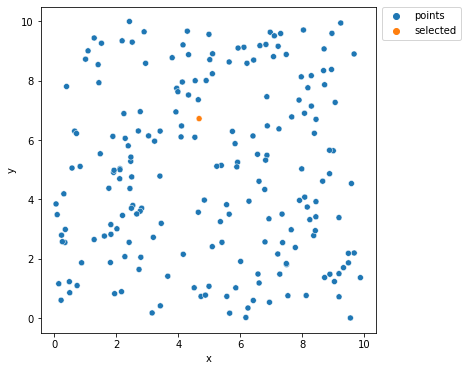

In [13]:
fig = plt.figure(figsize=(6,6))

## Mark the selected points in the *mark* attribute

sns.scatterplot(data=df_2d, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# One Rule Classifier implementation
- Load the *tennis.csv* into the Pandas CSV
- Implement the classification algorithm that generates one rule for each predictor in the data, then selects the rule with the smallest total error as its "one rule".
- Beware the fact that "ONE rule" it meant as a rule-set for ONE feature, i.e. there will be multiple rules created
- Find the rule-set with lowest error rate and print both error and rule-set
- You can take a look at [this website](https://www.saedsayad.com/oner.htm)

In [14]:
tennis = pd.read_csv('../data/tennis.csv')
tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Try to compute error for a given rules
- IF outlook == sunny THEN play = yes
- IF outlook == sunny THEN play = no
- Which one is better?

In [15]:
tennis.loc[tennis['outlook'] == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [16]:
tennis.loc[tennis['outlook'] == 'sunny'].shape

(5, 5)

In [17]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [18]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')].shape

(2, 5)

## Error rate for the play = yes
- 3/5

In [19]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')].shape

(3, 5)

In [20]:
(tennis.loc[tennis['outlook'] == 'sunny'].shape[0] - tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')].shape[0]) / tennis.loc[tennis['outlook'] == 'sunny'].shape[0]

0.6

In [21]:
5 - 3 / 5


4.4

## Error rate for the play = no
- 2/5

In [22]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [23]:
(tennis.loc[tennis['outlook'] == 'sunny'].shape[0] - tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')].shape[0]) / tennis.loc[tennis['outlook'] == 'sunny'].shape[0]
tennis.loc[tennis['outlook'] == 'sunny'].shape[0]
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')].shape[0]) / tennis.loc[tennis['outlook'] == 'sunny'].shape[0]

SyntaxError: unmatched ')' (1029057651.py, line 3)

## How to compute the total error rate for an attribute?
- It's just a fraction with sum the partaial number of errors of the individual rules as a nominator and number of rows as a denominator :-)
- e.g. 5/14 for the Temperature-related rules

Hint: How to get just an unique values of a given feature? Just use *.unique()* method from Pandas


# Implement the 1R classifier in your code and print the best rule-set
- Example output:
~~~
IF outlook == sunny THEN play = no
IF outlook == overcast THEN play = yes
IF outlook == rainy THEN play = yes
~~~

In [ ]:
tennis.loc[(tennis['outlook'] == 'overcast'),: ]
yes_c = tennis.loc[(tennis.outlook == 'rainy') & (tennis.play == 'yes')].shape[0] 
(tennis.loc[tennis.outlook == 'rainy'].shape[0] - yes_c) / tennis.loc[(tennis.outlook == 'rainy')].shape[0]

0.4

In [ ]:
tennis.outlook.unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [28]:
def total_error(column):
    features = tennis[column].unique()
    err_sum = 0
    for f in features:
        err_sum += (tennis.loc[tennis[column] == f].shape[0] - tennis.loc[(tennis[column] == f) & (
            tennis['play'] == 'yes')].shape[0]) / tennis.loc[tennis[column] == f].shape[0]

    return err_sum / tennis.shape[0]
    pass


In [32]:
total_error('outlook')


0.07142857142857142

In [ ]:
tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Tasks
## Task 1 (1p)
1. Load the data points from *'data_points_grid.csv'*
2. Create function for Manhattan distance calculation - you can see [this](https://en.wikipedia.org/wiki/Taxicab_geometry)
3. Use Manhattan distance for the distance matrix calculation
- Select point on index **421**, calculate its neighborhood points with eps <= 1.5
- Visualize the result
4. Use Euclidean distance for the distance matrix calculation
- Select point on index **421**, calculate its neighborhood points with eps <= 1.5
- Visualize the result

**Describe the differences you see for both of the images in a Markdown cell!**

#### Optional
- Repeat the process for 2-Dimensional random data used during excersice. 
- Use Manhattan distance instead of Euclidean. Do you see any difference?



## Task 2 (1p)
- Finish the Single-rule (1R) classifier implementation



In [ ]:
def manhattan_distance(x, y):
    assert x.size == y.size
    res = 0
    for i in range(x.size):
        res += abs(x[i] - y[i])

    return res

In [ ]:
df_2d_grid = pd.read_csv('../data/data_points_grid.csv', index_col=0)
data = df_2d_grid.values
df_2d_grid.head()
data = df_2d_grid.values
data



array([[ 0.        ,  0.        ],
       [ 0.25641026,  0.        ],
       [ 0.51282051,  0.        ],
       ...,
       [ 9.48717949, 10.        ],
       [ 9.74358974, 10.        ],
       [10.        , 10.        ]])

In [ ]:
n_points = df_2d_grid.shape[0]
distance_matrix = None

# Your code
distance_matrix = np.zeros(shape=(n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = manhattan_distance(data[i], data[j])

distance_matrix 

array([[ 0.        ,  0.25641026,  0.51282051, ..., 19.48717949,
        19.74358974, 20.        ],
       [ 0.25641026,  0.        ,  0.25641026, ..., 19.23076923,
        19.48717949, 19.74358974],
       [ 0.51282051,  0.25641026,  0.        , ..., 18.97435897,
        19.23076923, 19.48717949],
       ...,
       [19.48717949, 19.23076923, 18.97435897, ...,  0.        ,
         0.25641026,  0.51282051],
       [19.74358974, 19.48717949, 19.23076923, ...,  0.25641026,
         0.        ,  0.25641026],
       [20.        , 19.74358974, 19.48717949, ...,  0.51282051,
         0.25641026,  0.        ]])

In [ ]:
selected_point_id = 421
df_2d_grid['mark'] = 'points'
# df_2d_grid.loc[selected_point_id, 'mark'] = 'selected'
eps = 1.5
neightbours = np.where(distance_matrix[selected_point_id, :] < eps)[0]
neightbours

array([221, 260, 261, 262, 299, 300, 301, 302, 303, 338, 339, 340, 341,
       342, 343, 344, 377, 378, 379, 380, 381, 382, 383, 384, 385, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 457, 458, 459,
       460, 461, 462, 463, 464, 465, 498, 499, 500, 501, 502, 503, 504,
       539, 540, 541, 542, 543, 580, 581, 582, 621])

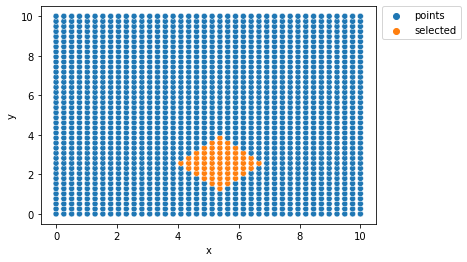

In [ ]:
for n in neightbours:
    df_2d_grid.loc[n, 'mark'] = 'selected'

sns.scatterplot(data=df_2d_grid, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
n_points = data.shape[0]
distance_matrix = None

# Your code
distance_matrix = np.zeros(shape=(n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = euclid_distance(data[i], data[j])

distance_matrix  

array([[ 0.        ,  0.25641026,  0.51282051, ..., 13.78428724,
        13.96200348, 14.14213562],
       [ 0.25641026,  0.        ,  0.25641026, ..., 13.60908155,
        13.78428724, 13.96200348],
       [ 0.51282051,  0.25641026,  0.        , ..., 13.43648462,
        13.60908155, 13.78428724],
       ...,
       [13.78428724, 13.60908155, 13.43648462, ...,  0.        ,
         0.25641026,  0.51282051],
       [13.96200348, 13.78428724, 13.60908155, ...,  0.25641026,
         0.        ,  0.25641026],
       [14.14213562, 13.96200348, 13.78428724, ...,  0.51282051,
         0.25641026,  0.        ]])

In [ ]:
eps = 1.5
neightbours = np.where(distance_matrix[selected_point_id, :] < eps)[0]


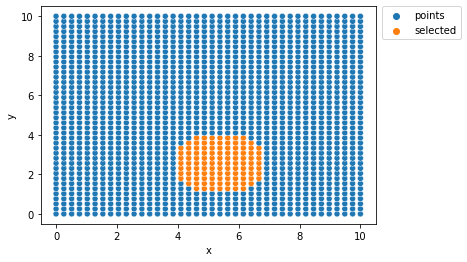

In [ ]:
for n in neightbours:
    df_2d_grid.loc[n, 'mark'] = 'selected'

sns.scatterplot(data=df_2d_grid, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Diference
We can see the diference in shape of neightbours, in menheton distance its more like triangel shape, but in euclide distance we can see all corners are rounded and we have more neighbours around the origin with same eps.

  